In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/projectdata/googleplaystore.csv
/kaggle/input/projectdata/googleplaystore_user_reviews.csv


### Data Collection

In [2]:
data=pd.read_csv("/kaggle/input/projectdata/googleplaystore.csv")
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Figure out whether we have some invalid entries in data or not?

In [4]:
data[data['Rating']<0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [5]:
data[data['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


##### while preprocessing and viewing the data i observed that in this Datasets the maximum rating of an app is 19 which is not posible yet,we know that the maximum rating of an app in the google play store is 5. >>so we confenditly says that something wrong.

##### By viewing this we say that in the row where rating>5 all data are placed wrong by one position so shift the data to the right hand size and make correct position.

In [6]:
data.iloc[10472,1:]=data.iloc[10472,1:].shift(1)

### >>By shifting the row right by 1 we get actual value of rating

**if you run above code block it will shift the row to right by 1 on every execution so be carefull and see the output of row that is shifted for desired result**

In [7]:
data.iloc[10472,:]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

## Feature engineering of Last_updated feature
##### This add 2 more columns in the data set by spliting the last updated attribute,logic behind by doing this is to find that in which year apps are added or updated on playstore.

In [8]:
data['Last Updated']=pd.to_datetime(data['Last Updated'])
data['year_updated']=data['Last Updated'].dt.year
data['month_updated']=data['Last Updated'].dt.month
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_updated,month_updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6


## Data Visualization


### What type of services people loves either paid or free??

In [9]:
data['Type'].isna().sum()      # find number of missing value

1

In [10]:
data.dropna(subset=['Type'],inplace=True)     
# drop NA value from subset Type and update it

In [11]:
data['Type'].unique()            # find all unique subcategory

array(['Free', 'Paid'], dtype=object)

In [12]:
labels=data['Type'].value_counts().index
values=data['Type'].value_counts().values
# for plotting pie plot

In [13]:
import plotly.express as px
px.pie(names=labels,values=values)

##### The observation from above pie chart is that 92.6% apps are freee and 7.38% apps are paid on google playstore.

## Lets perform analysis with respect to both free & paid applications..

In [14]:
df_free=data[data['Type']=='Free']    # data wrt free apps
df_paid=data[data['Type']=='Paid']    # data wrt paid apps

In [15]:
free=df_free['year_updated'].value_counts().reset_index()
# count free apps updated every year and reset the index
free.columns=['year','count']
# rename column
free

,year,count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [16]:
paid=df_paid['year_updated'].value_counts().reset_index()
# count paid apps updated every year and reset the index
paid.columns=['year','count']
# rename column
paid

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3


##### Paid data does not have 2010 column so append a column for 2010 with 0 apps

In [17]:
paid = paid.append({'year':2010,'count':0},ignore_index=True)
paid

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3
8,2010,0


In [18]:
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 740.0 kB/s eta 0:00:00


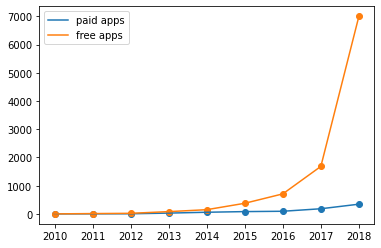

In [19]:
plt.scatter(paid["year"],paid["count"])
plt.plot(paid["year"],paid["count"], label ="paid apps")
plt.scatter(free["year"],free["count"])
plt.plot(free["year"],free["count"], label = "free apps")
plt.legend()
plt.show()

### For better visualization

In [20]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot,iplot

In [21]:
trace1=go.Scatter(x=free['year'],y=free['count'])
trace2=go.Scatter(x=paid['year'],y=paid['count'])

In [22]:
layout={
    'xaxis':{'title':'years'},
    'yaxis':{'title':'Number of apps'}
}

In [23]:
fig=go.Figure(data=[trace1,trace2],layout=layout)
iplot(fig)

#### In the above plot I have plotted the app updated or added over the year. By observing this plot we conclude that before 2011 there were no paid apps. But with the year free apps are added in huge ammount in comparision to paid apps.

### Automate above stuffs

In [24]:
def stats(dataframe,feature,column1,column2):
    df=dataframe[feature].value_counts().reset_index()
    df.columns=[column1,column2]
    return df

In [25]:
free = stats(df_free,'year_updated','year','count')
free

,year,count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [26]:
paid = stats(df_paid,'year_updated','year','count')
paid = paid.append({'year':2010,'count':0},ignore_index=True)
paid

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3
8,2010,0


In [27]:
def need_visual(df1=None,df2=None,column1=None,column2=None,dict_layout=None,visual='scatter'):
    if visual=='scatter':
        trace1=go.Scatter(x=df1[column1],y=df1[column2])
        trace2=go.Scatter(x=df2[column1],y=df2[column2])
        y=[trace1,trace2]
        layout=dict_layout
        fig=go.Figure(data=y,layout=layout)
        return iplot(fig)
    elif visual=='bar':
        return px.bar(df1,x=column1,y=column2)

In [28]:
need_visual(free,paid,'year','count',dict_layout={'xaxis':{'title':'years'},'yaxis':{'title':'Number of apps'}})

## In which month Free apps added are most??

### Using above defined function

In [29]:
free_count=stats(df_free,'month_updated','month','count')
need_visual(df1=free_count,column1='month',column2='count',visual='bar')

## In which month Paid apps added are most??¶

### Using above defined function

In [30]:
paid_count=stats(df_paid,'month_updated','month','count')
need_visual(df1=paid_count,column1='month',column2='count',visual='bar')

### Getting a distrbution of Ratings¶

#### Checking uniques values in Rating

In [31]:
df_free['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 3.0, 1.9, 2.5, 2.8, 2.7,
       1.0, 2.9, 2.3, 2.6, 2.2, 1.7, 2.0, 2.4, 1.8, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

From above it can be seen that last vale 1.9 is a string rather than float so convert it into float

In [32]:
df_free.pivot_table(index = ['Rating'], aggfunc ='size')

Rating
1.0      14
1.2       1
1.4       3
1.5       3
1.6       4
1.7       7
1.8       7
1.9      13
2.0      11
2.1       8
2.2      14
2.3      18
2.4      17
2.5      20
2.6      23
2.7      23
2.8      39
2.9      40
3.0      75
3.1      65
3.2      62
3.3      97
3.4     117
3.5     152
3.6     164
3.7     228
3.8     282
3.9     370
4.0     546
4.1     676
4.2     890
4.3    1025
4.4    1031
4.5     965
4.6     741
4.7     446
4.8     195
4.9      81
5.0     246
1.9       1
dtype: int64

In [33]:
df_free['Rating'].replace('1.9',1.9,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The warning can be ignored as we can see from Rating data that only 1.9 sting value is coverted to float and no other changes.
For SettingWithCopyWarning visit https://www.dataquest.io/blog/settingwithcopywarning/

In [34]:
df_free.pivot_table(index = ['Rating'], aggfunc ='size')

Rating
1.0      14
1.2       1
1.4       3
1.5       3
1.6       4
1.7       7
1.8       7
1.9      14
2.0      11
2.1       8
2.2      14
2.3      18
2.4      17
2.5      20
2.6      23
2.7      23
2.8      39
2.9      40
3.0      75
3.1      65
3.2      62
3.3      97
3.4     117
3.5     152
3.6     164
3.7     228
3.8     282
3.9     370
4.0     546
4.1     676
4.2     890
4.3    1025
4.4    1031
4.5     965
4.6     741
4.7     446
4.8     195
4.9      81
5.0     246
dtype: int64

In [35]:
df_free['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.6, 2.2, 1.7, 2. , 2.4, 1.8, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [36]:
df_paid['Rating'].unique()

array([4.7, 4.8, 4.0, 4.2, 2.6, nan, 3.5, 4.9, 4.6, 4.1, 4.4, 4.5, 4.3,
       3.0, 3.9, 3.2, 3.8, 2.5, 5.0, 3.4, 3.6, 1.0, 1.8, 3.3, 3.7, 2.9,
       2.8, 2.7, 2.4, 3.1, 1.7, 2.0, 2.3], dtype=object)

Now all unique values of rating for both free and paid apps are float or int we can plot histogram

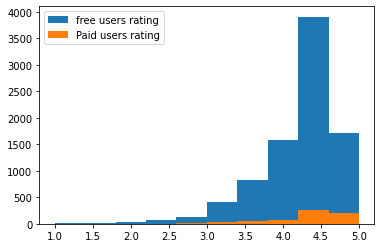

In [37]:
plt.hist(df_free['Rating'].dropna(),label='free users rating')
plt.hist(df_paid['Rating'].dropna(),label='Paid users rating')
plt.legend()
plt.show()

### Analysing App Category¶

In [38]:
free_cat=stats(df_free,'Category','categories','count').sort_values(by='categories')
free_cat

,categories,count
29,ART_AND_DESIGN,62
26,AUTO_AND_VEHICLES,82
32,BEAUTY,53
18,BOOKS_AND_REFERENCE,203
3,BUSINESS,446
30,COMICS,60
6,COMMUNICATION,360
17,DATING,227
20,EDUCATION,152
21,ENTERTAINMENT,147


In [39]:
paid_cat=stats(df_paid,'Category','categories','count').sort_values(by='categories')
paid_cat

,categories,count
22,ART_AND_DESIGN,3
20,AUTO_AND_VEHICLES,3
6,BOOKS_AND_REFERENCE,28
13,BUSINESS,14
7,COMMUNICATION,27
16,DATING,7
18,EDUCATION,4
24,ENTERTAINMENT,2
29,EVENTS,1
0,FAMILY,191


In [40]:
need_visual(free_cat,paid_cat,'categories','count')

### Analysing Android version feature

In [41]:
free_android=stats(df_free,'Android Ver','Android_versions','Total_apps').sort_values(by='Android_versions')
free_android

,Android_versions,Total_apps
27,1.0 and up,2
19,1.5 and up,14
13,1.6 and up,77
17,2.0 and up,26
26,2.0.1 and up,2
12,2.1 and up,107
31,2.2 - 7.1.1,1
11,2.2 and up,195
5,2.3 and up,580
8,2.3.3 and up,251


In [42]:
paid_android=stats(df_paid,'Android Ver','Android_versions','Total_apps').sort_values(by='Android_versions')
paid_android

,Android_versions,Total_apps
16,1.5 and up,6
7,1.6 and up,39
17,2.0 and up,6
18,2.0.1 and up,5
11,2.1 and up,27
5,2.2 and up,49
3,2.3 and up,72
10,2.3.3 and up,30
8,3.0 and up,34
23,3.1 and up,1


In [43]:
need_visual(free_android,paid_android,'Android_versions','Total_apps')

### Total Installs distribution

In [44]:
# to maintain hierarchy call sort_values
free_inst=stats(df_free,'Installs','installs','count').sort_values(by='installs')
free_inst

,installs,count
19,0+,4
18,1+,46
4,"1,000+",759
0,"1,000,000+",1555
17,"1,000,000,000+",58
11,10+,316
3,"10,000+",925
1,"10,000,000+",1249
6,100+,623
2,"100,000+",1079


In [45]:
paid_inst=stats(df_paid,'Installs','installs','count').sort_values(by='installs')
paid_inst

,installs,count
13,0+,10
10,1+,21
0,"1,000+",149
9,"1,000,000+",24
4,10+,70
1,"10,000+",129
14,"10,000,000+",3
2,100+,96
3,"100,000+",90
12,5+,12


In [46]:
need_visual(free_inst,paid_inst,'installs','count')

By observing the above plot highest installs of the apps are crossing the 1M than 10M than 100k, very less app are crossing the 500M and dream install 1B.

## Data Cleaning

In [47]:
### create a copy of your data so that wahatever manipulations I will do , just perforn it on dataframe

dataframe=data.copy()

In [48]:
dataframe.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_updated,month_updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6


In [49]:
dataframe.shape

(10840, 15)

In [50]:
dataframe.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'year_updated', 'month_updated'],
      dtype='object')

In [51]:
dataframe.dtypes

App                       object
Category                  object
Rating                    object
Reviews                   object
Size                      object
Installs                  object
Type                      object
Price                     object
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
year_updated               int64
month_updated              int64
dtype: object

### Data Cleaning on Price feature

In [52]:
dataframe['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [53]:
x='$4.99'

In [54]:
float(x[1:])

4.99

In [55]:
def remove_dollar(x):
    if x=='0':
        return 0
    else:
        return float(x[1:])

In [56]:
dataframe['Price']=dataframe['Price'].apply(remove_dollar)

In [57]:
dataframe['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [58]:
dataframe['Price'].dtype

dtype('float64')

## Clean rating feature

In [59]:
dataframe['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

From above it can be seen that last vale 1.9 is a string rather than float so convert it into float

In [60]:
dataframe['Rating'].replace('1.9',1.9,inplace=True)

In [61]:
dataframe['Rating'].dtype

dtype('float64')

#### Automate function to convert string into float.

In [62]:
def convert_into_float(feature,df):
    print('Before manipulation, Data type of {} was {}'.format(feature,df[feature].dtype))
    df[feature]=df[feature].astype(float)
    print('After manipulation, Data type of {} is {}'.format(feature,df[feature].dtype))

In [63]:
dataframe['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [64]:
### lets convert data-type of Reviews from objec to float
convert_into_float('Reviews',dataframe)

Before manipulation, Data type of Reviews was object
After manipulation, Data type of Reviews is float64


### Data Cleaning for installs

In [65]:
dataframe['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [66]:
dataframe['Installs'][0]

'10,000+'

In [67]:
x=dataframe['Installs'][0].replace(',','')
x = int(x.replace('+',''))
x

10000

In [68]:
def clean_installs(x):
    x=x.replace(',','')
    return int(x.replace('+',''))

In [69]:
dataframe['Installs']=dataframe['Installs'].apply(clean_installs)

In [70]:
dataframe['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

### Data Cleaning on Size feature

In [71]:
dataframe['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10840, dtype: object

In [72]:
float(dataframe['Size'][0][0:-1])

19.0

In [73]:
def convert_into_MB(x):
    if 'M' in x:
        return float(x[0:-1])
    else:
        mb=float(x[0:-1])/1024
        mb=np.round(mb,2)
        return mb

In [74]:
convert_into_MB('234K')

0.23

In [75]:
# dataframe['Size'].apply(convert_into_MB)


Remove string value "Varies with device"

In [76]:
filter=dataframe['Size']=='Varies with device'
data3=dataframe[~filter]

In [77]:
data3['Size']

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10835    9.6M
10836     53M
10837    3.6M
10838    9.5M
10840     19M
Name: Size, Length: 9146, dtype: object

In [78]:
data3['Size']=data3['Size'].apply(convert_into_MB)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
data3['Size'].median()

13.0

#### Now in dataframe replace 'Varies with device' with Median because 10839 apps has 'Varies with device' entry as it is a huge number and may create biasness in our model we are not replacing with mean because mean is affected by extreme high or low value and our model get biased.

In [80]:
dataframe['Size'].replace('Varies with device','13M',inplace=True)

In [81]:
dataframe['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', '13M', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M', '8.9M', '3.9M',
       '2.9M', '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M',
       '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M', '7.1M', '3.7M',
       '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M', '4.9M', '9.5M',
       '5.0M', '5.9M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '7.2M',
       '2.1M', '42M', '7.3M', '9.1M', '55M', '23k', '6.5M', '1.5M',
       '7.5M', '51M', '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M',
       '3.3M', '40M', '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k',
       '8.4M', '118k', '44M', '695k', '1.6M', '6.2M', '18k', '53M',
     

In [82]:
dataframe['Size']=dataframe['Size'].apply(convert_into_MB)

In [83]:
dataframe['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839    13.0
10840    19.0
Name: Size, Length: 10840, dtype: float64

### Feature Selection using SelectKBest to select most significant features¶

In [84]:
dataframe.isnull().sum()

App                  0
Category             1
Rating            1473
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
year_updated         0
month_updated        0
dtype: int64

In [85]:
fe=dataframe.dropna()

In [86]:
fe.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
year_updated      0
month_updated     0
dtype: int64

In [87]:
ind_features=['Reviews','Size','Installs','Price']

In [88]:
X=fe[ind_features]
y=fe['Rating']

In [89]:
X.shape

(9360, 4)

In [90]:
y.shape

(9360,)

###### To find releveant features for my regression model , i use SelectKBest
##### SelectKBest calculate p-value and select K best relevant features


In [91]:
from sklearn.feature_selection import SelectKBest,f_regression

In [92]:
## SelectKBest(Score_func=f_regression , k='no_of_features i want')

X_new=SelectKBest(f_regression,k=3).fit_transform(X,y)

In [93]:
X.head(5)

,Reviews,Size,Installs,Price
0,159.0,19.0,10000,0.0
1,967.0,14.0,500000,0.0
2,87510.0,8.7,5000000,0.0
3,215644.0,25.0,50000000,0.0
4,967.0,2.8,100000,0.0


In [94]:
## it will select review , size & install
X_new[0:5]

array([[1.59000e+02, 1.90000e+01, 1.00000e+04],
       [9.67000e+02, 1.40000e+01, 5.00000e+05],
       [8.75100e+04, 8.70000e+00, 5.00000e+06],
       [2.15644e+05, 2.50000e+01, 5.00000e+07],
       [9.67000e+02, 2.80000e+00, 1.00000e+05]])

#### We will eliminate Price as due to less relationship between Price & Rating

In [95]:
dataframe.drop('Price',axis=1,inplace=True)

In [96]:
dataframe.corr()   # give corelation matrix

,Rating,Reviews,Size,Installs,year_updated,month_updated
Rating,1.000000,0.068147,0.066286,0.051393,0.137317,0.018075
Reviews,0.068147,1.000000,0.104032,0.643122,0.075537,0.045946
Size,0.066286,0.104032,1.000000,0.047699,0.181947,0.028715
Installs,0.051393,0.643122,0.047699,1.000000,0.089368,0.056466
year_updated,0.137317,0.075537,0.181947,0.089368,1.000000,-0.187359
month_updated,0.018075,0.045946,0.028715,0.056466,-0.187359,1.000000


## Outliers Detection & Dealing with it..

##### Outliers Detection in size,reviews,ratings & Installs

<AxesSubplot:xlabel='Size', ylabel='Density'>

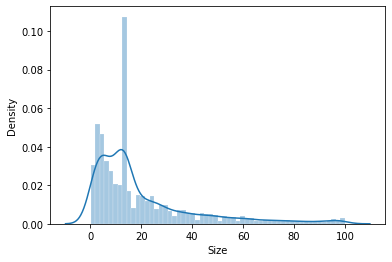

In [97]:
sns.histplot(
    dataframe['Size'], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)

As the above graph is Right skewed it means we have high outliers i.e. some values are very high

### Outliers removal in Size using 1 std dev
    ie whatever data is outside of (mean +- 1*std dev) , just remove it..

In [98]:
def remove_outliers_sd(df,feature):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('Type'):
        m=np.mean(subdf[feature])
        sd=np.std(subdf[feature])
        reduced_df=subdf[(subdf[feature]>(m-sd)) & (subdf[feature]<(m+sd))]
        
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [99]:
op=remove_outliers_sd(dataframe,'Size')

In [100]:
op.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_updated,month_updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1


<AxesSubplot:xlabel='Size', ylabel='Density'>

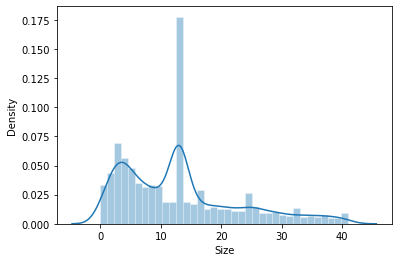

In [101]:
sns.histplot(
    op['Size'], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)

### Outliers in Installs using IQR(Interquantile Range)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Installs', ylabel='Density'>

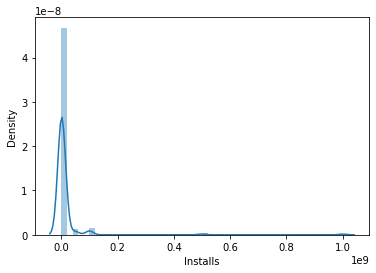

In [102]:
sns.distplot(op['Installs'])
#using this bcs histogram plot is not giving coreect plot

<AxesSubplot:xlabel='Installs'>

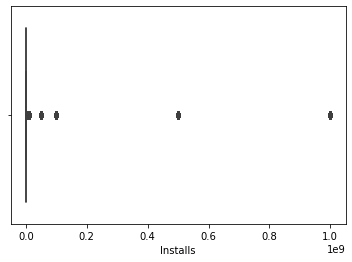

In [103]:
sns.boxplot(x=op['Installs'])

Q1 represents the 1st quartile/25th percentile of the data.
Q2 represents the 2nd quartile/median/50th percentile of the data.
Q3 represents the 3rd quartile/75th percentile of the data.
(Q1–1.5IQR) represent the smallest value in the data set and (Q3+1.5IQR) represnt the largest value in the data set.

In [104]:
q1=op['Installs'].quantile(0.25)
q3=op['Installs'].quantile(0.75)
iqr=q3-q1
iqr

999000.0

In [105]:
lower_tail=q1-1.5*iqr
print(lower_tail)
upper_tail=q3+1.5*iqr
print(upper_tail)

-1497500.0
2498500.0


In [106]:
outliers=[]

for installs in op['Installs']:
    if installs > upper_tail or installs < lower_tail:
        outliers.append(installs)
    else:
        continue

In [107]:
len(outliers)

2207

In [108]:
### Replace Outliers with the median value

for installs in op['Installs']:
    if installs > upper_tail or installs < lower_tail:
        op['Installs']=op['Installs'].replace(installs,np.median(op['Installs']))
    else:
        continue

<AxesSubplot:xlabel='Installs', ylabel='Density'>

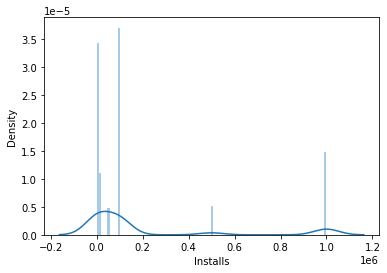

In [109]:
sns.histplot(
    op['Installs'], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)

<AxesSubplot:xlabel='Installs'>

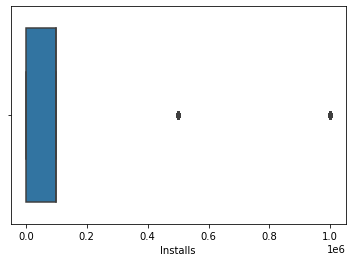

In [110]:
sns.boxplot(x=op['Installs'])

### Outliers in Reviews

<AxesSubplot:xlabel='Reviews'>

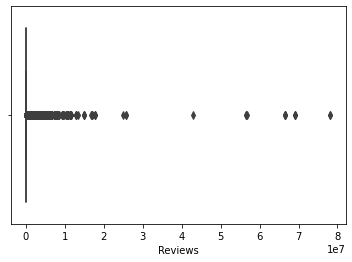

In [111]:
sns.boxplot(x=op['Reviews'])

In [112]:
### After surfing on internet the suggested value of 1e7(10^7) as Threshold value.

## data points that are > than 1e7 are outliers
threshold=1e7
op[op['Reviews']>threshold].shape

(58, 14)

#### Replacing Outliers with the Median..

In [113]:
op['Reviews']=np.where(op['Reviews']>threshold,op['Reviews'].median(),op['Reviews'])

<AxesSubplot:xlabel='Reviews'>

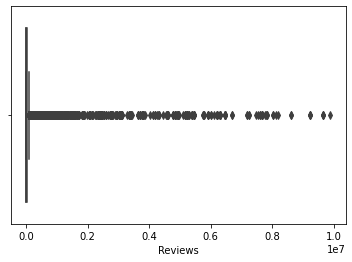

In [114]:
sns.boxplot(x=op['Reviews'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Reviews', ylabel='Density'>

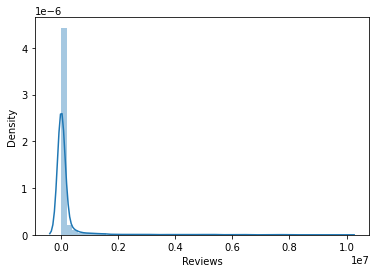

In [115]:
sns.distplot(op['Reviews'])

##### Still lots of right skewness
##### we can Log transformation to remove this positive skewness(high outliers)

### Applying Log Transformation

In [116]:
op['Reviews']=np.log1p(op['Reviews']) 
# log1p will not perform on 0 values.

<AxesSubplot:xlabel='Reviews', ylabel='Density'>

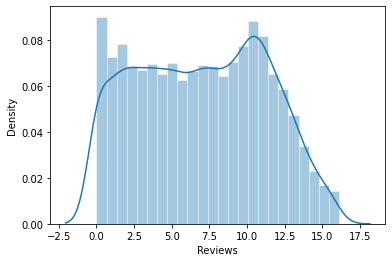

In [117]:
sns.histplot(
    op['Reviews'], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)

## now it is approximately close to Normal Distribution..

### lets fill out missing values first in Rating

In [118]:
op['Rating'].isnull().sum()

1396

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

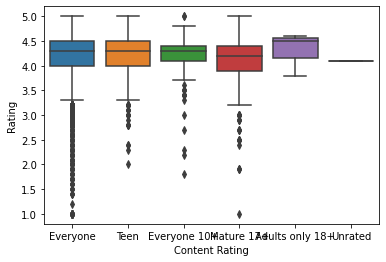

In [119]:
sns.boxplot(x='Content Rating',y='Rating',data=op)


##### we can visualise in box plot that,for class Everyone,avg rating is somewhere around 4.3,
##### for Teen,it is around approx 4.3, 
##### but we will not that much accurate results , to get accurate we will use groupby on Content Rating..

In [120]:
op.groupby('Content Rating')['Rating'].median()

Content Rating
Adults only 18+    4.5
Everyone           4.3
Everyone 10+       4.3
Mature 17+         4.2
Teen               4.3
Unrated            4.1
Name: Rating, dtype: float64

In [121]:
op.groupby('Content Rating')['Rating'].mean()

Content Rating
Adults only 18+    4.300000
Everyone           4.178822
Everyone 10+       4.213910
Mature 17+         4.103448
Teen               4.212376
Unrated            4.100000
Name: Rating, dtype: float64

In [122]:
#create a func where we r giving rating & content rating col in a list(cols)

def impute_Rating(cols):
    
    #first col is rating,2nd col is basically content rating..
    Rating=cols[0]
    Content_rating=cols[1]
    
    #ie if there is a null value in a col
    if pd.isnull(Rating):
        if Content_rating=='Adults only 18+':
            return 4.3
        elif Content_rating=='Everyone':
            return 4.17
        elif Content_rating=='Everyone 10+':
            return 4.21
        elif Content_rating=='Mature 17+':
            return 4.10
        elif Content_rating=='Teen':
            return 4.21
        else:
            return 4.10
        
    #when not null we basically return rating value     
    else:
        return Rating

In [123]:
#apply func
op['Rating']=op[['Rating','Content Rating']].apply(impute_Rating,axis=1)

In [124]:
op['Rating'].isnull().sum()

0

<AxesSubplot:>

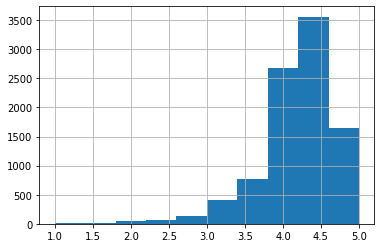

In [125]:
op['Rating'].hist()

##### As our Dependent feature count is varying alot  , as it is not a Normally distributed data  , as count of 4.1 is too high so if we will build a model considering this Rating feature ,our model accuracy gets fluctauted alot

##### So we will do some manipulations on Rating & convert it into Discrete nature..

In [126]:
def convert(x):
    if x>0.0 and x<=1.5:
        return 1
    elif x>1.5 and x<=2.5:
        return 2
    elif x>2.5 and x<=3.5:
        return 3
    elif x>3.5 and x<=4.5:
        return 4
    else:
        return 5
    

In [127]:
op['Rating']=op['Rating'].apply(convert)

In [128]:
op.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_updated,month_updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,5.075174,19.0,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,4,6.875232,14.0,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1


<AxesSubplot:xlabel='Rating', ylabel='count'>

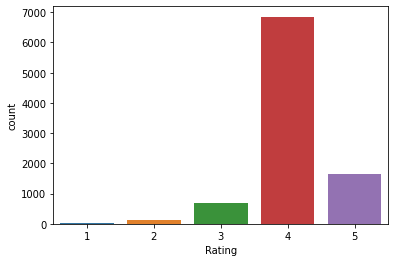

In [129]:
sns.countplot(x=op['Rating'])

In [130]:
final=op.copy()

## Feature Encoding

### Perform Mean Encoding on Cateogry

In [131]:
mean_ordinal=final.groupby('Category')['Rating'].mean().to_dict()

In [132]:
final['Category']=final['Category'].map(mean_ordinal)

In [133]:
final['Category']

0       4.307692
1       4.307692
2       4.307692
3       4.307692
4       4.307692
          ...   
9315    4.076294
9316    4.176471
9317    4.139752
9318    4.076294
9319    4.076294
Name: Category, Length: 9320, dtype: float64

In [134]:
final.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_updated,month_updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.307692,4,5.075174,19.0,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,4.307692,4,6.875232,14.0,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.307692,5,11.379520,8.7,100000,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,4.307692,4,12.281389,25.0,100000,Free,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,4.307692,4,6.875232,2.8,100000,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6


### Applying Target Guided Mean encoding On Content_Rating

In [135]:
final['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [136]:
ordinal_labels=final.groupby('Content Rating')['Rating'].mean().sort_values().index
ordinal_labels

Index(['Unrated', 'Mature 17+', 'Everyone', 'Everyone 10+', 'Teen',
       'Adults only 18+'],
      dtype='object', name='Content Rating')

### Now we have to convert this List into dictionary so that we can directly map it

In [137]:
dict_store={key:value for value,key in enumerate(ordinal_labels)}
dict_store

{'Unrated': 0,
 'Mature 17+': 1,
 'Everyone': 2,
 'Everyone 10+': 3,
 'Teen': 4,
 'Adults only 18+': 5}

In [138]:
final['Content Rating']=final['Content Rating'].map(dict_store)

In [139]:
final.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_updated,month_updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.307692,4,5.075174,19.0,10000,Free,2,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,4.307692,4,6.875232,14.0,500000,Free,2,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1


### Applying Label Encoding on Type column

In [140]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [141]:
final['Type']=le.fit_transform(final['Type'])
final.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_updated,month_updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.307692,4,5.075174,19.0,10000,0,2,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,4.307692,4,6.875232,14.0,500000,0,2,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.307692,5,11.379520,8.7,100000,0,2,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8


In [142]:
final.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'year_updated', 'month_updated'],
      dtype='object')

#### Drop all the un-necessary columns..

In [143]:
final.drop(labels=['App','Genres','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [144]:
final.head(2)

,Category,Rating,Reviews,Size,Installs,Type,Content Rating,year_updated,month_updated
0,4.307692,4,5.075174,19.0,10000,0,2,2018,1
1,4.307692,4,6.875232,14.0,500000,0,2,2018,1


In [145]:
final.isna().sum()

Category          1
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Content Rating    0
year_updated      0
month_updated     0
dtype: int64

Only 1 null value so we can drop that it does not affect our model

In [146]:
final.dropna(inplace=True)

In [147]:
final.isna().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Content Rating    0
year_updated      0
month_updated     0
dtype: int64

In [148]:
dataframe2=final.copy()

In [149]:
dataframe2.head()

,Category,Rating,Reviews,Size,Installs,Type,Content Rating,year_updated,month_updated
0,4.307692,4,5.075174,19.0,10000,0,2,2018,1
1,4.307692,4,6.875232,14.0,500000,0,2,2018,1
2,4.307692,5,11.379520,8.7,100000,0,2,2018,8
3,4.307692,4,12.281389,25.0,100000,0,4,2018,6
4,4.307692,4,6.875232,2.8,100000,0,2,2018,6


#### Assign Independent and Dependent features to X and y 

In [150]:
X=dataframe2.drop('Rating',axis=1)
X

,Category,Reviews,Size,Installs,Type,Content Rating,year_updated,month_updated
0,4.307692,5.075174,19.00,10000,0,2,2018,1
1,4.307692,6.875232,14.00,500000,0,2,2018,1
2,4.307692,11.379520,8.70,100000,0,2,2018,8
3,4.307692,12.281389,25.00,100000,0,4,2018,6
4,4.307692,6.875232,2.80,100000,0,2,2018,6
...,...,...,...,...,...,...,...,...
9315,4.076294,2.890372,0.15,100,1,1,2015,11
9316,4.176471,3.583519,2.40,1000,1,2,2018,8
9317,4.139752,5.533389,11.00,10000,1,4,2015,2
9318,4.076294,7.248504,9.50,10000,1,2,2018,6


In [151]:
y=dataframe2['Rating']
y

0       4
1       4
2       5
3       4
4       4
       ..
9315    4
9316    4
9317    4
9318    4
9319    4
Name: Rating, Length: 9319, dtype: int64

### Splitting the dataset into The Training set and Testing set

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [153]:
X_train

,Category,Reviews,Size,Installs,Type,Content Rating,year_updated,month_updated
4362,4.095238,12.776527,13.00,100000,0,2,2018,8
2849,4.094293,10.878349,2.20,100000,0,2,2017,11
6633,3.961306,10.727904,0.17,100000,0,2,2018,1
1609,4.139752,15.409114,13.00,100000,0,3,2018,6
446,3.989446,7.084226,13.00,100000,0,2,2018,7
...,...,...,...,...,...,...,...,...
5940,4.128514,5.402677,9.50,50000,0,4,2017,8
5871,4.076294,7.433667,5.80,500000,0,2,2016,6
8900,4.075000,8.008366,26.00,10000,1,2,2018,8
2258,4.030000,11.128307,13.00,100000,0,2,2018,5


### Building ML model(Logistic Regression Model)

In [154]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

In [155]:
X_train

,Category,Reviews,Size,Installs,Type,Content Rating,year_updated,month_updated
4362,4.095238,12.776527,13.00,100000,0,2,2018,8
2849,4.094293,10.878349,2.20,100000,0,2,2017,11
6633,3.961306,10.727904,0.17,100000,0,2,2018,1
1609,4.139752,15.409114,13.00,100000,0,3,2018,6
446,3.989446,7.084226,13.00,100000,0,2,2018,7
...,...,...,...,...,...,...,...,...
5940,4.128514,5.402677,9.50,50000,0,4,2017,8
5871,4.076294,7.433667,5.80,500000,0,2,2016,6
8900,4.075000,8.008366,26.00,10000,1,2,2018,8
2258,4.030000,11.128307,13.00,100000,0,2,2018,5


In [156]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

##### Predict test set result

In [157]:
y_pred=classifier.predict(X_test)
y

0       4
1       4
2       5
3       4
4       4
       ..
9315    4
9316    4
9317    4
9318    4
9319    4
Name: Rating, Length: 9319, dtype: int64

##### Making confusion Matrix

In [158]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[   0,    0,    0,    2,    0],
       [   0,    0,    0,   25,    0],
       [   0,    0,    0,  114,    0],
       [   0,    0,    0, 1392,    0],
       [   0,    0,    0,  331,    0]])

In [159]:
accuracy_score(y_test,y_pred)

0.7467811158798283

## Automate ML model

In [160]:
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    print('predictions are : \n {}'.format(y_predict))
    print('\n')
    
    cm=confusion_matrix(y_test,y_predict)
    print('Confusion Matrix: \n {}'.format(cm))
    print('\n')
    
    acc=accuracy_score(y_test,y_predict)
    print('Accuracy score : {}'.format(acc))

In [161]:
from sklearn.ensemble import RandomForestClassifier
predict(RandomForestClassifier())

predictions are : 
 [4 4 4 ... 4 4 4]


Confusion Matrix: 
 [[   0    0    0    2    0]
 [   0    0    2   22    1]
 [   0    0    4  107    3]
 [   0    1   16 1307   68]
 [   0    0    3  222  106]]


Accuracy score : 0.7601931330472103


### Hypertune Logistic Model

In [162]:
from sklearn.linear_model import LogisticRegression
log_class=LogisticRegression()

In [163]:
grid={'C':10.0 ** np.arange(-2,3),'penalty':['l1','l2']}
grid

{'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'penalty': ['l1', 'l2']}

In [164]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(estimator=log_class,param_grid=grid,cv=5,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [165]:
clf.best_estimator_

LogisticRegression(C=0.01)

In [166]:
clf.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [167]:
log=LogisticRegression(C= 0.01, penalty= 'l2')

In [168]:
log.fit(X_train,y_train)
pred2=log.predict(X_test)
print(accuracy_score(y_test,pred2))

0.7467811158798283


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### Hypertune Random Forest Model

In [169]:
from sklearn.model_selection import RandomizedSearchCV

In [170]:
from sklearn.ensemble import RandomForestClassifier

In [171]:
rf=RandomForestClassifier()

In [172]:
n_estimators=[int(x) for x in np.linspace(200,2000,5)]
max_features=["auto", "sqrt", "log2"]
max_depth=[int(x) for x in np.linspace(10,2000,5)]

min_samples_leaf=[1,2,4,6]
min_samples_split=[2,5,10,14]

In [173]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_leaf':min_samples_leaf,
    'min_samples_split':min_samples_split,
    'criterion':['entropy','gini']
}

In [174]:
print(random_grid)

{'n_estimators': [200, 650, 1100, 1550, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 507, 1005, 1502, 2000], 'min_samples_leaf': [1, 2, 4, 6], 'min_samples_split': [2, 5, 10, 14], 'criterion': ['entropy', 'gini']}


In [175]:
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=20,cv=3,verbose=2,random_state=100,n_jobs=-1)

In [176]:
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END criterion=gini, max_depth=507, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  22.5s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] END criterion=gini, max_depth=507, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  22.7s
[CV] END criterion=gini, max_depth=507, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  22.9s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 507, 1005, 1502,
                                                      2000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 650, 1100, 1550,
                                                         2000]},
                   random_state=100, verbose=2)

In [177]:
pred3=rf_randomcv.predict(X_test)
print(accuracy_score(y_test,pred3))

0.7607296137339056
